## Intro to Data mining
Welcome everyone to this notebook, through it you can learn many things

In [1]:
# import the required libraries

# library for loading data
import pandas as pd

# library for numurical operation
import numpy as np

# library for plotting things.
import matplotlib.pyplot as plt
import seaborn as sns

Lets start by loading our dataset and show it

In [2]:
# getting the dataset
dataset = pd.read_csv('Mall_Customers.csv')

# display the first rows
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Exploratory Data analysis
Often we start by studing the dataset, 

In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


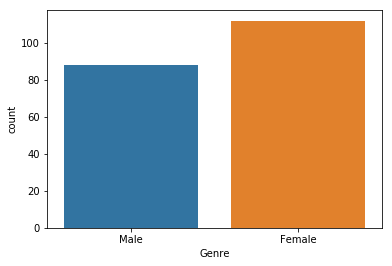

In [7]:
sns.countplot(x = 'Genre', data = dataset)

C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


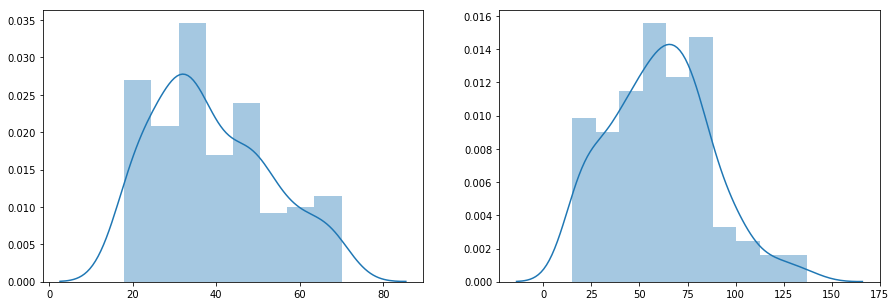

In [48]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(dataset['Age'].values)
fig.add_subplot(1, 2, 2)
sns.distplot(dataset['Annual Income (k$)'].values)

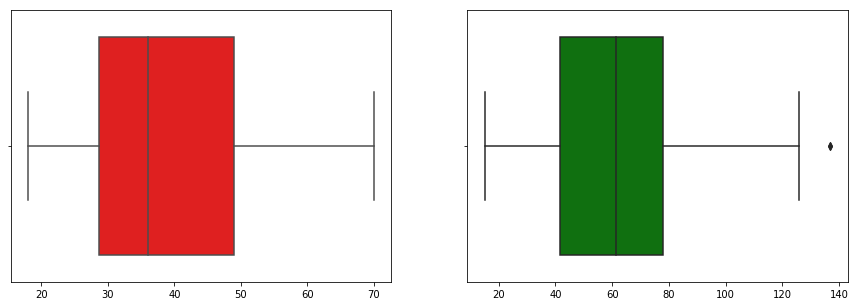

In [47]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.boxplot(dataset['Age'].values , color = 'red')
fig.add_subplot(1, 2, 2)
sns.boxplot(dataset['Annual Income (k$)'].values  , color = 'green')

# Data Preprocessing.
We will use only the Age and the Income as features, and we will try to segment with clustering algorithms

In [33]:
new_data = dataset.iloc[:, [3,4]]
new_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data_df = scaler.fit_transform(new_data)
new_data_df = pd.DataFrame(new_data_df)

In [35]:
new_data_df.head()

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


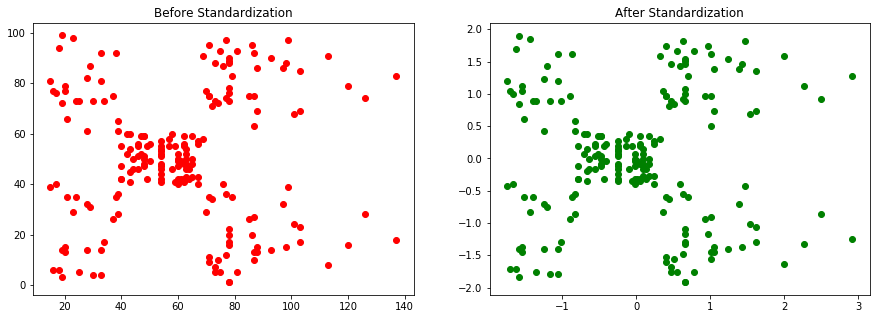

In [44]:
fig = plt.figure(figsize=(15,5))

# first plot
fig.add_subplot(1, 2, 1)
plt.scatter(new_data.iloc[:,0] , new_data.iloc[:,1] ,  c = 'r')
plt.title('Before Standardization')

# second plot
fig.add_subplot(1, 2, 2)
plt.scatter(new_data_df.iloc[:,0] , new_data_df.iloc[:,1] , c= 'g')
plt.title('After Standardization')

plt.show()

# Clustering
Now we are ready for the clustering algorithms, there are multiple algorithm out there, and in sklearn also, we gonna use only kmeans but you can choose other, here is other provided in the library.
    - Mean Shift
    - DBSCAN
    - EM
    - Agglomerative Hierarchical Clustering

In [51]:
X = new_data_df.values

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

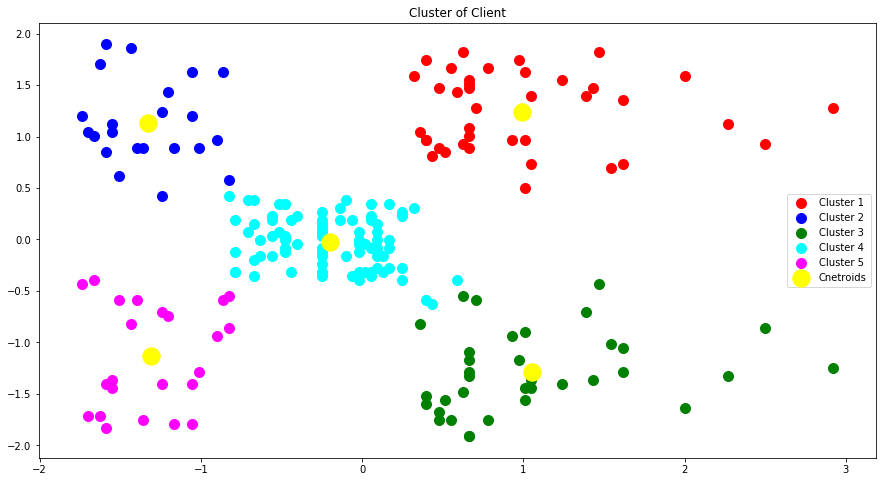

In [68]:
# plot the clusters
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100 , c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100 , c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100 , c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100 , c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100 , c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Cnetroids')
plt.title('Cluster of Client')
plt.legend()
plt.show()

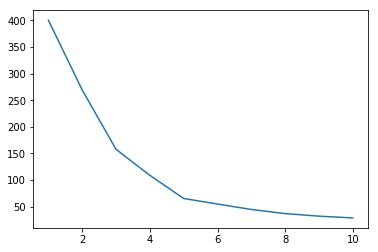

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

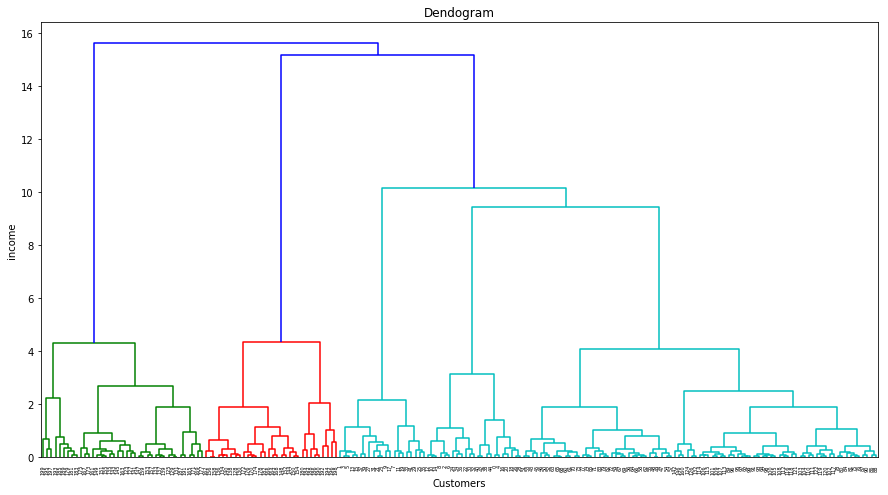

In [59]:
# using the dandgrom to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('income')
plt.show()

In [61]:
#fitting HC to dataset
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters =5)
y_agg = agg.fit_predict(X)

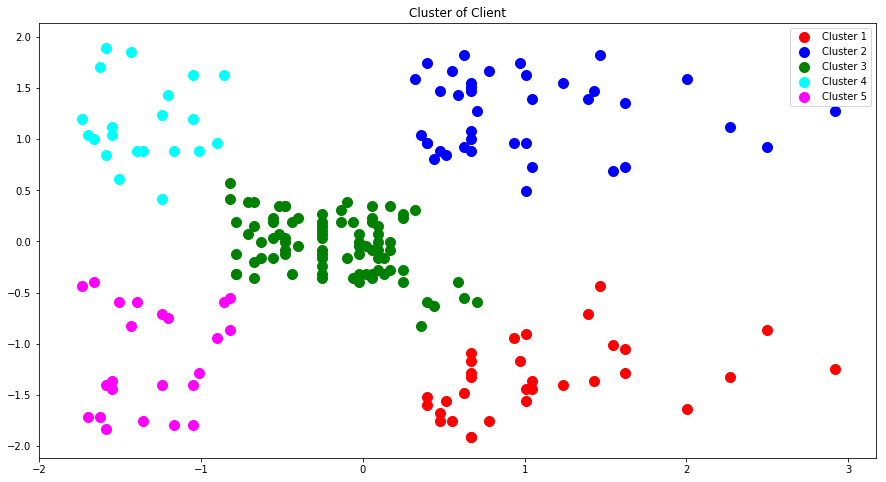

In [63]:
# plot the clusters
plt.figure(figsize=(15,8))
plt.scatter(X[y_agg == 0,0],X[y_agg == 0,1],s=100 , c = 'red', label = 'Cluster 1')
plt.scatter(X[y_agg == 1,0],X[y_agg == 1,1],s=100 , c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_agg == 2,0],X[y_agg == 2,1],s=100 , c = 'green', label = 'Cluster 3')
plt.scatter(X[y_agg == 3,0],X[y_agg == 3,1],s=100 , c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_agg == 4,0],X[y_agg == 4,1],s=100 , c = 'magenta', label = 'Cluster 5')
plt.title('Cluster of Client')
plt.legend()
plt.show()